In [1]:
import sys
print(sys.version)

import sklearn.ensemble
import shap
import numpy as np
import numba
import time
import json
import xgboost
from sklearn.datasets import make_regression
from sklearn.model_selection import train_test_split

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
import shap.benchmark

from shap import TreeExplainer as TreeCext

from shap.explainers.pytree import *

3.10.6 (main, Nov 14 2022, 16:10:14) [GCC 11.3.0]


/home/jarek/projects/shap/venv/lib/python3.10/site-packages/tqdm/auto.py:22: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [2]:
import warnings
warnings.filterwarnings('ignore')

In [3]:
np.set_printoptions(threshold=sys.maxsize)
# X,y = shap.datasets.communitiesandcrime()
X,y = shap.datasets.boston()
print(X.columns.values.tolist())
print(len(X.columns.values.tolist()))

print(X.shape)
print(y.shape)

['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX', 'PTRATIO', 'B', 'LSTAT']
13
(506, 13)
(506,)


In [3]:
# X,y = shap.datasets.boston()
# X = X.values
# X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)

# model = sklearn.ensemble.RandomForestRegressor(n_estimators=1000, max_depth=13)
# model.fit(X_train, y_train)

# TreeBanzCext = shap.explainers.Tree(model, use_banz=True, change_deltas=True)
# TreeBanzCext(X_test)

1
# ex = TreeExplainer(model)
# res_banz_py = ex.banz_values(X_test)


Function load_boston is deprecated; `load_boston` is deprecated in 1.0 and will be removed in 1.2.

    The Boston housing prices dataset has an ethical problem. You can refer to
    the documentation of this function for further details.

    The scikit-learn maintainers therefore strongly discourage the use of this
    dataset unless the purpose of the code is to study and educate about
    ethical issues in data science and machine learning.

    In this special case, you can fetch the dataset from the original
    source::

        import pandas as pd
        import numpy as np

        data_url = "http://lib.stat.cmu.edu/datasets/boston"
        raw_df = pd.read_csv(data_url, sep="\s+", skiprows=22, header=None)
        data = np.hstack([raw_df.values[::2, :], raw_df.values[1::2, :2]])
        target = raw_df.values[1::2, 2]

    Alternative datasets include the California housing dataset (i.e.
    :func:`~sklearn.datasets.fetch_california_housing`) and the Ames housing
    datase

ile drzew cext? 1000
uruchamiam z BANZ=True
using treeshap and cext
using BANZ
oto values:
[[ 2.49246539e-01  1.83426065e-02  1.81972577e-03 -6.78133897e-03
   2.36729293e-01 -3.28541251e+00  2.69896902e-01 -2.16193070e-02
  -2.42765120e-03 -2.64786902e-01  2.33307546e-01  4.35911429e-03
   3.90221512e+00]
 [ 1.06273596e+00  5.88005402e-03  1.06726581e-01 -4.34663882e-03
   1.01546551e-01 -1.68143647e+00 -1.68106907e-01  4.12853088e+00
   5.51467050e-02 -1.99210305e-01 -5.69418952e-01  5.23774840e-02
   3.96835721e+00]
 [ 3.24544335e-01  8.72484108e-03  6.94155101e-03  8.43447946e-02
   1.47739091e-01 -1.86513909e+00 -2.60095847e-01  3.52030602e-01
   2.70487511e-02  1.37442088e-01  5.70332701e-01  9.59729274e-02
  -1.66701475e-01]
 [-7.89874299e-01  3.98784981e-04  6.40005489e-02 -8.51644326e-03
  -7.46667272e-01 -1.99958394e+00 -5.63611245e-02 -6.00078604e-01
   3.34256713e-02 -2.34895734e-01 -3.10088409e-01  7.00200299e-02
  -6.77797108e+00]
 [ 2.80688060e-01  9.59407796e-03 -1.8168

1

In [4]:
# Zobaczmy na tym datasecie jaka glebokosc daje najlepsze wyszkolenie

X,y = shap.datasets.boston()
X = X.values
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)

scores = {}
mean = 5

for i in range(1,13):
    pass
    print(i)
    scores[i] = 0
    for j in range(mean):
        model = sklearn.ensemble.RandomForestRegressor(n_estimators=1000, max_depth=i)
        model.fit(X_train, y_train)
        scores[i] = scores[i] + model.score(X_test, y_test)
    scores[i] = scores[i] / mean

scores

Function load_boston is deprecated; `load_boston` is deprecated in 1.0 and will be removed in 1.2.

    The Boston housing prices dataset has an ethical problem. You can refer to
    the documentation of this function for further details.

    The scikit-learn maintainers therefore strongly discourage the use of this
    dataset unless the purpose of the code is to study and educate about
    ethical issues in data science and machine learning.

    In this special case, you can fetch the dataset from the original
    source::

        import pandas as pd
        import numpy as np

        data_url = "http://lib.stat.cmu.edu/datasets/boston"
        raw_df = pd.read_csv(data_url, sep="\s+", skiprows=22, header=None)
        data = np.hstack([raw_df.values[::2, :], raw_df.values[1::2, :2]])
        target = raw_df.values[1::2, 2]

    Alternative datasets include the California housing dataset (i.e.
    :func:`~sklearn.datasets.fetch_california_housing`) and the Ames housing
    datase

1
2
3
4
5
6
7
8
9
10
11
12


{1: 0.5009211482039321,
 2: 0.6652773204338898,
 3: 0.7568870651087272,
 4: 0.7767974830305755,
 5: 0.7825889281602969,
 6: 0.7893236457642716,
 7: 0.793918476688486,
 8: 0.7961638234157599,
 9: 0.7974202081773104,
 10: 0.7985664647493064,
 11: 0.7995699407626194,
 12: 0.7981452442011768}

In [5]:
def item_generator(json_input, lookup_key):
    if isinstance(json_input, dict):
        for k, v in json_input.items():
            if k == lookup_key:
                yield v
            else:
                yield from item_generator(v, lookup_key)
    elif isinstance(json_input, list):
        for item in json_input:
            yield from item_generator(item, lookup_key)

def tree_depth(json_text):
    json_input = json.loads(json_text)
    return max(list(item_generator(json_input, 'depth'))) + 1


In [36]:
# Zobaczmy na tym datasecie jaka glebokosc daje najlepsze wyszkolenie

X,y = shap.datasets.boston()
X = X.values
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)

scores = {}
mean_depths = {}
stddev_depths = {}
full_depths = {}

mean = 10

for i in range(1,32):
    print(i)
    scores[i] = 0
    mean_depths[i] = 0
    stddev_depths[i] = 0
    for j in range(mean):
        model = xgboost.XGBRegressor(n_estimators=1000, max_depth=i, subsample=0.3)
        X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)
        model.fit(X_train, y_train, eval_set=[(X_test, y_test)], early_stopping_rounds=10, verbose=False)
        scores[i] = scores[i] + model.score(X_test, y_test)
        
        booster = model.get_booster()
        tree_df = booster.trees_to_dataframe()
#         print("rysuje drzewo")
#         xgboost.plotting.plot_tree(booster)
        depths = [tree_depth(x) for x in booster.get_dump(dump_format = "json")]
        full_depths[i] = depths
        mean_depths[i] = mean_depths[i] + np.mean(depths)
        stddev_depths[i] = stddev_depths[i] + np.std(depths)
        
    scores[i] = scores[i] / mean
    mean_depths[i] = mean_depths[i] / mean
    stddev_depths[i] = stddev_depths[i] / mean

# print(scores)
# print(mean_depths)
# print(stddev_depths)

1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
{1: 0.7018261094430154, 2: 0.7243758293804515, 3: 0.6986064113063407, 4: 0.705608413838544, 5: 0.6955304118649813, 6: 0.7252414844090361, 7: 0.7429348593959045, 8: 0.7313673509740156, 9: 0.7614761444241187, 10: 0.7438366601087054, 11: 0.722146224301785, 12: 0.7656552088644036, 13: 0.7334134728842173, 14: 0.7543277222935896, 15: 0.7457779341470424, 16: 0.7470492055681658, 17: 0.7448073408651972, 18: 0.7446469724932488, 19: 0.7450046849043925, 20: 0.752337045906769, 21: 0.7458906367469833, 22: 0.7458906367469833, 23: 0.7458906367469833, 24: 0.7458906367469833, 25: 0.7458906367469833, 26: 0.7458906367469833, 27: 0.7458906367469833, 28: 0.7458906367469833, 29: 0.7458906367469833, 30: 0.7458906367469833, 31: 0.7458906367469833}
{1: 1.0, 2: 2.0, 3: 3.0, 4: 3.977777777777777, 5: 4.955555555555556, 6: 5.909090909090908, 7: 6.810810810810809, 8: 7.7027027027027035, 9: 8.527777777777777, 10: 9.394736842105262, 11

In [ ]:
# narysujmy sobie zaleznosc wytrenowania i glebokosci
sns.set()
n = len(scores)
to_plot_scores = [0] * n
to_plot_mean = [0] * n
to_plot_stddev = [0] * n

for i in scores.keys():
    to_plot_scores[i-1] = scores[i]
    to_plot_mean[i-1] = mean_depths[i]
    to_plot_stddev[i-1] = stddev_depths[i]

plt.title("Average score of models")
plt.ylabel("Accuracy in %")
plt.xlabel("Max tree depth")
plt.plot(to_plot_scores)
plt.show()
    
# ax = sns.heatmap(quality)
# plt.show()
# print(to_plot_mean)
# print(to_plot_stddev)

plt.title("Mean depth of tree in ensemble")
plt.ylabel("Mean depth")
plt.xlabel("Max tree depth")
plt.errorbar(range(len(to_plot_mean)), to_plot_mean, to_plot_stddev, linestyle='None', marker='^')
plt.show()

In [6]:
scores = {}
mean_depths = {}
stddev_depths = {}
full_depths = {}

mean = 10

for i in range(1,32):
    print(i)
    scores[i] = 0
    mean_depths[i] = 0
    stddev_depths[i] = 0
    for j in range(mean):
        model = xgboost.XGBRegressor(n_estimators=(100+i*100), max_depth=16, subsample=0.3)
        X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)
        model.fit(X_train, y_train, eval_set=[(X_test, y_test)], early_stopping_rounds=10, verbose=False)
        scores[i] = scores[i] + model.score(X_test, y_test)
        
        booster = model.get_booster()
        tree_df = booster.trees_to_dataframe()
#         print("rysuje drzewo")
#         xgboost.plotting.plot_tree(booster)
        depths = [tree_depth(x) for x in booster.get_dump(dump_format = "json")]
        full_depths[i] = depths
        mean_depths[i] = mean_depths[i] + np.mean(depths)
        stddev_depths[i] = stddev_depths[i] + np.std(depths)
        
    scores[i] = scores[i] / mean
    mean_depths[i] = mean_depths[i] / mean
    stddev_depths[i] = stddev_depths[i] / mean

1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31


In [9]:
print(scores)

{1: 0.7470492055681658, 2: 0.7470492055681658, 3: 0.7470492055681658, 4: 0.7470492055681658, 5: 0.7470492055681658, 6: 0.7470492055681658, 7: 0.7470492055681658, 8: 0.7470492055681658, 9: 0.7470492055681658, 10: 0.7470492055681658, 11: 0.7470492055681658, 12: 0.7470492055681658, 13: 0.7470492055681658, 14: 0.7470492055681658, 15: 0.7470492055681658, 16: 0.7470492055681658, 17: 0.7470492055681658, 18: 0.7470492055681658, 19: 0.7470492055681658, 20: 0.7470492055681658, 21: 0.7470492055681658, 22: 0.7470492055681658, 23: 0.7470492055681658, 24: 0.7470492055681658, 25: 0.7470492055681658, 26: 0.7470492055681658, 27: 0.7470492055681658, 28: 0.7470492055681658, 29: 0.7470492055681658, 30: 0.7470492055681658, 31: 0.7470492055681658}


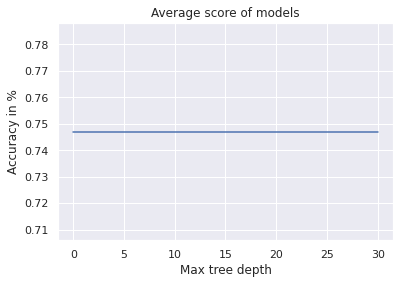

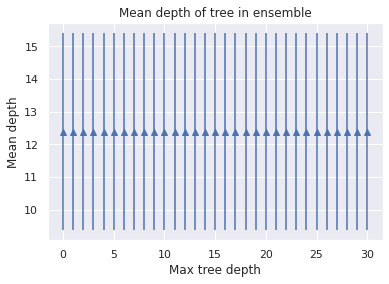

In [7]:
# narysujmy sobie zaleznosc wytrenowania i glebokosci
sns.set()
n = len(scores)
to_plot_scores = [0] * n
to_plot_mean = [0] * n
to_plot_stddev = [0] * n

for i in scores.keys():
    to_plot_scores[i-1] = scores[i]
    to_plot_mean[i-1] = mean_depths[i]
    to_plot_stddev[i-1] = stddev_depths[i]

plt.title("Average score of models")
plt.ylabel("Accuracy in %")
plt.xlabel("Max tree depth")
plt.plot(to_plot_scores)
plt.show()
    
# ax = sns.heatmap(quality)
# plt.show()
# print(to_plot_mean)
# print(to_plot_stddev)

plt.title("Mean depth of tree in ensemble")
plt.ylabel("Mean depth")
plt.xlabel("Max tree depth")
plt.errorbar(range(len(to_plot_mean)), to_plot_mean, to_plot_stddev, linestyle='None', marker='^')
plt.show()

In [12]:
res_shap_cext = {}
res_banz_cext = {}

time_shap_cext = {}
time_banz_cext = {}

for j in range (1):

    for i in range(100, 1000, 100):
        model = sklearn.ensemble.RandomForestRegressor(n_estimators=i, max_depth=16)
        model.fit(X, y)
        
        print("------------------------------")
        print(j, i)
        print("---")
        
        start = time.time()
        res_shap_cext[(i, j)] = TreeCext(model).shap_values(X, banz=False)
        time_shap_cext[(i, j)] = time.time() - start
        print(time_shap_cext[(i, j)])

        start = time.time()
        res_banz_cext[(i, j)] = TreeCext(model).shap_values(X, banz=True)
        time_banz_cext[(i, j)] = time.time() - start
        print(time_banz_cext[(i, j)])

------------------------------
0 100
---
ile drzew cext? 100
uruchamiam z BANZ=False
using treeshap and cext
here37
using dense_Tree_pred
2.481865882873535
ile drzew cext? 100
uruchamiam z BANZ=True
using treeshap and cext
using BANZ
1.9044535160064697
------------------------------
0 200
---
ile drzew cext? 200
uruchamiam z BANZ=False
using treeshap and cext
here37
using dense_Tree_pred
4.900674104690552
ile drzew cext? 200
uruchamiam z BANZ=True
using treeshap and cext
using BANZ
3.813408374786377
------------------------------
0 300
---
ile drzew cext? 300
uruchamiam z BANZ=False
using treeshap and cext
here37
using dense_Tree_pred
7.180166482925415
ile drzew cext? 300
uruchamiam z BANZ=True
using treeshap and cext
using BANZ
5.6238884925842285
------------------------------
0 400
---
ile drzew cext? 400
uruchamiam z BANZ=False
using treeshap and cext
here37
using dense_Tree_pred
9.55237102508545
ile drzew cext? 400
uruchamiam z BANZ=True
using treeshap and cext
using BANZ
7.4267899

In [15]:
res_shap_cext = [res_shap_cext[(i, 0)] for i in range(100, 1000, 100)]
res_banz_cext = [res_banz_cext[(i, 0)] for i in range(100, 1000, 100)]
time_shap_cext = [time_shap_cext[(i, 0)] for i in range(100, 1000, 100)]
time_banz_cext = [time_banz_cext[(i, 0)] for i in range(100, 1000, 100)]

In [17]:
res_shap_cext

[array([[ 2.31598646e-01, -3.63273136e-03,  8.68078142e-02,
         -5.59099737e-03, -6.45700406e-02, -1.09271198e+00,
         -1.79799443e-01, -9.93228711e-02, -2.23241130e-01,
         -1.45147222e-01,  4.21896798e-01,  1.73964142e-02,
          4.86639794e+00],
        [ 1.98991304e-01, -1.07811428e-02, -2.72923408e-02,
         -4.13950766e-03,  3.45779437e-01, -1.92094297e+00,
         -1.77606541e-01, -2.16492623e-01, -8.25570631e-02,
          1.10883081e-01,  1.85728672e-01,  3.80117528e-02,
          1.51333196e+00],
        [ 1.53858896e-01, -1.50039491e-02, -3.73072850e-02,
         -2.14470302e-02,  4.69209909e-01,  6.11311114e+00,
          6.14895646e-02, -2.40436546e-01, -4.32169060e-02,
          2.73819317e-01,  1.10405698e-01,  7.52752426e-02,
          5.10778148e+00],
        [ 7.84484704e-02,  5.65846341e-03,  9.73745105e-02,
         -1.60724575e-02,  4.55318852e-01,  4.38575737e+00,
          1.96333193e-01, -3.06263234e-01,  4.16497558e-02,
          6.6654335

In [ ]:
model = xgboost.XGBRegressor(n_estimators=1000, max_depth=5, subsample=0.3)
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)
model.fit(X_train, y_train, eval_set=[(X_test, y_test)], early_stopping_rounds=10, verbose=False)

booster = model.get_booster()
tree_df = booster.trees_to_dataframe()

In [ ]:
tree_df

In [ ]:
plt.plot([x * 10 for x in scores.values()])
plt.plot(mean_depths.values())
plt.plot(stddev_depths.values())

plt.show()

# wychodza glebokosci po 13 jak da mu sie wolna reke

In [ ]:
def run_explain(name, explainer, data):
    start = time.time()
    values = explainer(data)
    end = time.time()
    print("name: {}, time: {}".format(name, end - start))
    return [name, values, end - start]

In [ ]:
def run_diff_explainers(model, X_train, X_eval):
    attributions = {}


    # use an independent masker
    masker = shap.maskers.Independent(X_train)
    pmasker = shap.maskers.Partition(X_train)

    explainers = [
        ("Tree", shap.explainers.Tree(model)),
        ("TreeBanz", shap.explainers.Tree(model,  use_banz=True)),
        ("NEW TreeBanz", shap.explainers.Tree(model,  use_banz=True, change_deltas=True)),
    #     ("Tree approx.", shap.explainers.Tree(model, masker, approximate=True)),
    #     ("Exact", shap.explainers.Exact(model.predict, masker)),
    ]

    attributions[1000] = [run_explain(name, exp, X_eval) for name, exp in explainers]
    
    return attributions

In [ ]:
def show_results(attributions):
    a = attributions[1000]
    # print(a[0][1])


#     plt.stackplot(range(len(a[0][1].values[0])), a[0][1].values[0], a[1][1].values[0], a[2][1].values[0],
#                  labels=["Tree", "TreeBanz", "NEW TreeBanz"])
    
    plt.plot(range(len(a[0][1].values[0])), a[0][1].values[0])
    plt.plot(range(len(a[0][1].values[0])), a[1][1].values[0])
    plt.plot(range(len(a[0][1].values[0])), a[2][1].values[0])
    
    plt.legend()
    # plt.subplot(a)
    plt.show()

    shap.plots.bar(a[0][1][0]) #tree
    shap.plots.bar(a[1][1][0]) #treeBanz
    shap.plots.bar(a[2][1][0]) #NEWtreeBanz

In [ ]:
X,y = shap.datasets.boston()
X = X.values

model = xgboost.XGBRegressor(n_estimators=1000, max_depth=32, subsample=0.3)
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)
model.fit(X_train, y_train, eval_set=[(X_test, y_test)], early_stopping_rounds=10, verbose=False)
X_eval = X_test[:1]

attributions = run_diff_explainers(model, X_train, X_eval)

show_results(attributions)

In [ ]:
X,y = shap.datasets.boston()
X = X.values

model = sklearn.ensemble.RandomForestRegressor(n_estimators=1000, max_depth=14)
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)
model.fit(X_train, y_train)
X_eval = X_test[:1]

attributions = run_diff_explainers(model, X_train, X_eval)

show_results(attributions)

In [ ]:
v = {}
for i in range(3):
    v[i] = [(x / attributions[1000][i][1].values[0][0]) for x in attributions[1000][i][1].values[0]]

v

In [ ]:
shap.plots.beeswarm(a[0][1])
shap.plots.beeswarm(a[1][1])

In [ ]:
# # dry run to get all the code warmed up for valid runtime measurements
# for name, exp in explainers:
#     exp(X_eval[:1])

# explain with all the explainers
attributions = [run_explain(name, exp, X_eval) for name, exp in explainers]

In [ ]:
X, y = make_regression(n_samples=400, n_features=16, n_informative=8,random_state=0, shuffle=False)

model = sklearn.ensemble.RandomForestRegressor(n_estimators=1000, max_depth=10)
model.fit(X, y)

In [ ]:
# bst = xgboost.train({"learning_rate": 0.01, "max_depth": 4}, xgboost.DMatrix(X, label=y), 1000)

In [ ]:
# start = time.time()
# shap_values = bst.predict(xgboost.DMatrix(X), pred_contribs=True)
# print(time.time() - start)


In [ ]:

# x = X.head()
# x = X[:1]
x = X
x

In [ ]:
start = time.time()
res_shap_cext = TreeCext(model).shap_values(X, banz=False)
time_shap_cext = time.time() - start
time_shap_cext

In [ ]:
start = time.time()
res_banz_cext = TreeCext(model).shap_values(X, banz=True)
time_banz_cext = time.time() - start
time_banz_cext

In [ ]:
res_shap_cext

In [ ]:
res_banz_cext

In [ ]:
ex = TreeExplainer(model)
start = time.time()
res_shap_py = ex.shap_values(x)
time_shap_py = time.time() - start

In [ ]:
start = time.time()
res_banz_py = ex.banz_values(x)
time_banz_py = time.time() - start

In [ ]:
line = np.asarray(x[:1])
ex.brute_banz(line[0], 0)

In [ ]:
ex.brute_shap(line[0], 0)

In [ ]:
results_dict_cext = {}
results_dict_cext['banz'] = {}
results_dict_cext['shap'] = {}

In [ ]:
for i in range(1, 10):
    X, y = make_regression(n_samples=200 * i, n_features=16, n_informative=8,random_state=0, shuffle=False)

    model = sklearn.ensemble.RandomForestRegressor(n_estimators=1000 + 100 * i, max_depth=10 + i)
    model.fit(X, y)
    
    start = time.time()
    res_shap_cext = TreeCext(model).shap_values(x, banz=False)
    res_shap = time.time() - start
    
    start = time.time()
    res_banz_cext = TreeCext(model).shap_values(x, banz=True)
    res_banz = time.time() - start
    
    print(res_shap)
    print(res_banz)
    results_dict_cext['banz'][i] = res_banz
    results_dict_cext['shap'][i] = res_shap
    

In [ ]:
x = [i for i in results_dict_cext['banz']]
a1 = [results_dict_cext['banz'][i] for i in results_dict_cext['banz']]
a2 = [results_dict_cext['shap'][i] for i in results_dict_cext['shap']]

y_values = {"banz": a1, "treeshap": a2}
labels = ["BANZ", "TREESHAP"]

fig, ax = plt.subplots()
ax.stackplot(x, y_values.values(), labels=labels)

ax.legend(loc='upper left')
plt.show()

In [ ]:
results_dict_py = {}
results_dict_py['banz'] = {}
results_dict_py['shap'] = {}

In [ ]:
for i in range(1, 10):
    X, y = make_regression(n_samples=100 + 25 * i, n_features=6, n_informative=2,random_state=0, shuffle=False)

    model = sklearn.ensemble.RandomForestRegressor(n_estimators=100 + 25 * i, max_depth=4)
    model.fit(X, y)
    
    ex = TreeExplainer(model)
    print('created model')
    start = time.time()
    res_shap_py = ex.shap_values(X)
    time_shap_py = time.time() - start
    
    start = time.time()
    res_banz_py = ex.banz_values(X)
    time_banz_py = time.time() - start
    
    print(res_shap_py)
    print(res_banz_py)
    results_dict_py['banz'][i] = time_banz_py
    results_dict_py['shap'][i] = time_shap_py
    

In [ ]:
x = [i for i in results_dict_py['banz']]
a1 = [results_dict_py['banz'][i] for i in results_dict_py['banz']]
a2 = [results_dict_py['shap'][i] for i in results_dict_py['shap']]

y_values = {"banz": a1, "treeshap": a2}
labels = ["BANZ", "TREESHAP"]

fig, ax = plt.subplots()
ax.stackplot(x, y_values.values(), labels=labels)

ax.legend(loc='upper left')
plt.show()

In [ ]:
len(a1)

In [ ]:
len(a2)